In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
#import os 
#os.chdir("/content/drive/MyDrive/Proyecto_Transitos_DHA1001/DHA1001_Transito")
import astroscrappy
import photutils
import astroalign
import matplotlib.pyplot as plt
from transitos_dha1001 import *
# mine
from agregado import *

In [5]:
data_loc = "data/"
recalc=False

# Introducción
# Desarrollo
## 1) Análisis de datos - WASP-103 
El primer paso es reducir los datos, removiendo el ruido generado por distintos fenomenos de los que hablaremos mas adelante. Para hacer esto generaremos 3 filtros que aplicaremos al grupo de imagenes que queremos estudiar.
Una vez hayan sido filtradas, volveremos a centrar las imagenes dejandolas listas para medir la fotometria.

In [6]:
# Generamos los grupos de imagenes para cada filtro
bias_stuff = [ "Bias{0:08d}.fit".format(i) for i in range(319,329) ]
dark_stuff = [ "Dark{0:08d}.fit".format(i) for i in range(313,318) ]
flat_stuff = [ "FLAT_sloan_r_B22-{0:03d}.fit".format(i) for i in range(1,6)]

# calculamos la mediana de las imagenes bias
crear_masterbias(bias_stuff, nombre_bias="MasterBias.fits",
                 directorio_imagenes_originales= data_loc+"wasp103_raw",
                 directorio_imagenes_reducidas= data_loc+"wasp103_red",
                 recalcular= recalc)

In [10]:
# se resta el bias a las fotos y calculamos la mediana
crear_masterdark(dark_stuff, nombre_dark="MasterDark.fits",
                 nombre_bias="MasterBias.fits",
                 directorio_imagenes_originales= data_loc+"wasp103_raw", 
                 directorio_imagenes_reducidas= data_loc+"wasp103_red", 
                 recalcular= recalc)

In [11]:
# se resta el bias y el dark y se calcula la mediana
crear_masterflat(flat_stuff, 
                 nombre_flat="MasterFlat.fits",
                 nombre_dark="MasterDark.fits",
                 nombre_bias="MasterBias.fits",
                 directorio_imagenes_originales= data_loc+"wasp103_raw",
                 directorio_imagenes_reducidas= data_loc+"wasp103_red",
                 recalcular= recalc)

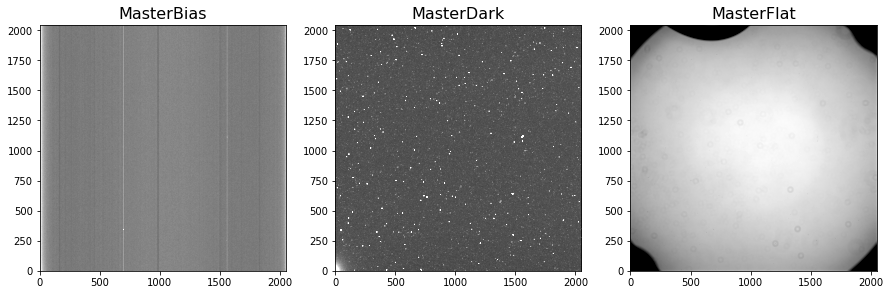

In [18]:
main = plt.figure(figsize=(15,10))
agregar_imagen( plt.subplot(1,3,1), data_loc+"wasp103_red/MasterBias.fits", titulo="MasterBias")
agregar_imagen( plt.subplot(1,3,2), data_loc+"wasp103_red/MasterDark.fits", titulo="MasterDark")
agregar_imagen( plt.subplot(1,3,3), data_loc+"wasp103_red/MasterFlat.fits", titulo="MasterFlat")

In [21]:
# aplicamos los filtros generados a las imagenes que queremos estudiar
waw_science = [ "{0:08d}.fit".format(i) for i in range(1,94)]
reducir_imagenes_ciencia( waw_science, 
                          reyeccion_rayos_cosmicos=True,
                          nombre_flat="MasterFlat.fits",
                          nombre_dark="MasterDark.fits",
                          nombre_bias="MasterBias.fits",
                          directorio_imagenes_originales= data_loc+"wasp103_raw", 
                          directorio_imagenes_reducidas= data_loc+"wasp103_red", 
                          recalcular= recalc)

In [22]:
# alineamos las imagenes
waw_science_reduced = [ "ciencia_{0:08d}.fit".format(i) for i in range(1,94) ]
alinear_imagenes_ciencia( waw_science_reduced,
                          prefijo='ali',
                          directorio_imagenes_reducidas= data_loc+"wasp103_red",
                          recalcular= recalc)

Ahora que hemos limpiado las imagenes, podemos proceder a 

In [23]:
#------------
# encontrar las fuentes en la imagen de ref
pos_referencia = dao_busqueda("ali_ciencia_00000001.fit",
                              directorio_imagenes_reducidas= data_loc+"wasp103_red",
                              directorio_fotometria= data_loc+"wasp103_fot",
                              recalcular = recalc)

In [24]:
# encontrar las fuentes en el resto de la imagen
img_reducidas_alineadas = [ "ali_ciencia_{0:08d}.fit".format(i) for i in range(1,94) ]
for imagen in img_reducidas_alineadas[1:]:
    _ = dao_recentrar(imagen,
                      pos_referencia, 
                      directorio_imagenes_reducidas= data_loc+"wasp103_red",
                      directorio_fotometria= data_loc+"wasp103_fot", 
                      caja_busqueda=21,
                      recalcular = recalc)

Recentrando fuentes en la imagen ali_ciencia_00000002.fit
Recentrando fuentes en la imagen ali_ciencia_00000003.fit
Recentrando fuentes en la imagen ali_ciencia_00000004.fit
Recentrando fuentes en la imagen ali_ciencia_00000005.fit
Recentrando fuentes en la imagen ali_ciencia_00000006.fit
Recentrando fuentes en la imagen ali_ciencia_00000007.fit
Recentrando fuentes en la imagen ali_ciencia_00000008.fit
Recentrando fuentes en la imagen ali_ciencia_00000009.fit
Recentrando fuentes en la imagen ali_ciencia_00000010.fit
Recentrando fuentes en la imagen ali_ciencia_00000011.fit
Recentrando fuentes en la imagen ali_ciencia_00000012.fit
Recentrando fuentes en la imagen ali_ciencia_00000013.fit
Recentrando fuentes en la imagen ali_ciencia_00000014.fit
Recentrando fuentes en la imagen ali_ciencia_00000015.fit
Recentrando fuentes en la imagen ali_ciencia_00000016.fit
Recentrando fuentes en la imagen ali_ciencia_00000017.fit
Recentrando fuentes en la imagen ali_ciencia_00000018.fit
Recentrando fu

In [45]:
# medir la fotometría de apertura
for imagen in img_reducidas_alineadas[1:]:
    _, _ = medir_fotometria(imagen, r_ap=3.0,
                     directorio_imagenes_reducidas= data_loc+"wasp103_red",
                     directorio_fotometria= data_loc+"wasp103_fot", 
                     bkg_type='global',
                     recalcular= recalc)
    

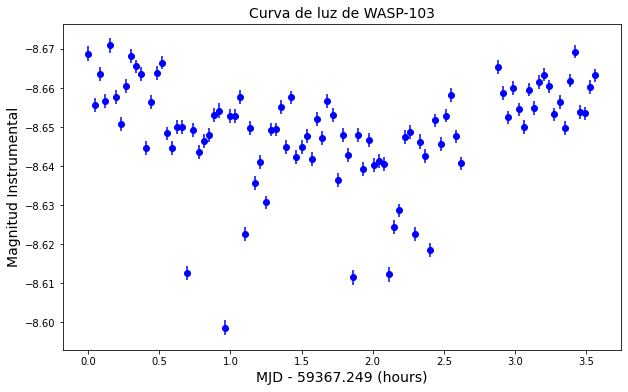

In [46]:
#-------------
#
x_wasp103 = 1039
y_wasp103 = 1132 

mjd, mag, mag_err = curva_de_luz(img_reducidas_alineadas, 
                                 x_wasp103, y_wasp103, 
                                 directorio_imagenes_reducidas= data_loc+"wasp103_red",
                                 directorio_fotometria= data_loc+"wasp103_fot")

graficar_curva_de_luz(mjd, mag, mag_err, titulo="Curva de luz de WASP-103")

[19, 26, 30, 51, 58, 59, 60, 63, 66]


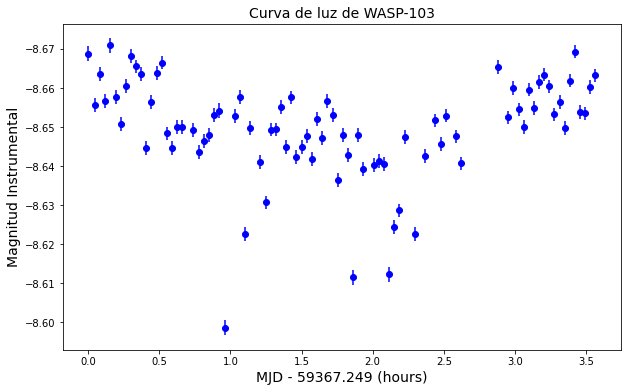

In [48]:
print([ i for i in range(len(mag)) if mag[i] > -8.63])
for i in [ i for i in range(len(mag)) if mag[i] > -8.63]:
    mag.pop(i)
    mag_err.pop(i)
    mjd.pop(i)
graficar_curva_de_luz(mjd, mag, mag_err, titulo="Curva de luz de WASP-103")

## 2) Análisis de las correcciones aplicadas

### filtro bias
Debido a que el proceso que ocupan las camaras CCD no es perfecto, tendra
medidas imperfectas en cada pixel de la camara al momento de generar una foto.
Si generamos fotos sin exponer el CCD podremos generar una mascara con estas
imperfecciones aisladas, con la cual podremos remover estas imperfecciones de
fotos que generemos posteriormente.

In [ ]:
main = plt.figure(figsize=(15,15))
uno = plt.subplot(1,2,1)
dos = plt.subplot(1,2,2)
agregar_imagen(uno, "wasp103_raw/00000001.fit", titulo='Imagen raw', cmin=1075, cmax=1190)
agregar_imagen(dos, "wasp103_red/ali_ciencia_00000001.fit", titulo='Imagen corregida', cmin=-10, cmax=100)

## 3) Correcciones propuestas

Una vez aplicadas las reducciones abarcadas en esta experiencia, aun pueden existir ciertos problemas presentes en las fotografias generadas que se deban a factores externos al CCD.


### I - Substracción del valor del fondo del cielo

Al momento de generar las fotografías astronómicas, es prácticamente imposible garantizar que todas las cuentas registradas por el sensor son atribuibles única y exclusivamente a la incidencia de la luz procedente de los cuerpos celestes en la superficie del CCD. En el campo visual de la cámara, existe una gran cantidad de fuentes luminosas que se suman con los rayos percibidos del objeto de estudio entre los cuales es posible mencionar a la Luna, la cual genera un fondo uniforme con cierto brillo grisáceo en las fotografías; y a la luz artificial de la ciudad [ insertar ciudad ] 
Considerando que estos valores se mantendran constantes a lo largo y ancho del fotograma original. De esta forma será suficiente con seleccionar una porción de la fotografía que no contenga estrellas, para de allí estimar el valor del fondo del cielo, el cual al tratarse de un ruido aditivo, debe ser sustraído de las fotografías antes de iniciar el proceso de fotometría.

Si queremos calcular el fondo del cielo a través de la mediana y asumimos que 


### II

## 4) Calculo de la variación del brillo

## 5) Calculo del % de error

## 6) Calculo del radio del exoplaneta

## 7) WASP-103 vs Sistema Solar

# Conclusión